<a href="https://colab.research.google.com/github/Vl-Leschinskii/Skill_box/blob/main/Chat_HW_attantion_model_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import codecs
import numpy as np
import pandas as pd
import re
import tensorflow as tf
import nltk
import string
from itertools import chain
print(tf.__version__)

2.4.1


#Подготовка данных

In [ ]:
data_fpath = '/content/movie_conversations.txt'
max_sentences = 10000

LcharacterID_f=[]
LcharacterID_s=[]
LmovieID=[]
Lorder=[]
f = open(data_fpath)
for line in f:
  uni_str=line.encode("windows-1251").decode("utf-8")
  characterID_f,characterID_s, movieID, order= uni_str.split(' +++$+++ ')
  LcharacterID_f.append(characterID_f)
  LcharacterID_s.append(characterID_s)
  LmovieID.append(movieID)
  ge= re.sub("']\n",'',order)
  ge= re.sub("\['",'',ge)
  ge= re.sub("'",'',ge)
  ge= re.sub(' ','',ge)
  ge=re.split(',',ge)   
  Lorder.append(ge)      

In [ ]:
np_movie_conversations=np.asarray((LcharacterID_f,LcharacterID_s,LmovieID,Lorder)).T

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
df_movie_conversations=pd.DataFrame(data=np_movie_conversations,
          index=np.array(range(len(np_movie_conversations))),
          columns=['characterID_f','characterID_s', 'movieID','order'] )

In [ ]:
df_movie_conversations.head()

,characterID_f,characterID_s,movieID,order
0,u0,u2,m0,"[L194, L195, L196, L197]"
1,u0,u2,m0,"[L198, L199]"
2,u0,u2,m0,"[L200, L201, L202, L203]"
3,u0,u2,m0,"[L204, L205, L206]"
4,u0,u2,m0,"[L207, L208]"


In [ ]:
sum_char=df_movie_conversations.groupby(['characterID_f','characterID_s']).count().reset_index() 

In [ ]:
df_movie_conversations['dia_len']=df_movie_conversations.order.apply(len)
df_movie_conversations.head()

,characterID_f,characterID_s,movieID,order,dia_len
0,u0,u2,m0,"[L194, L195, L196, L197]",4
1,u0,u2,m0,"[L198, L199]",2
2,u0,u2,m0,"[L200, L201, L202, L203]",4
3,u0,u2,m0,"[L204, L205, L206]",3
4,u0,u2,m0,"[L207, L208]",2


In [ ]:
dia_2=df_movie_conversations[df_movie_conversations['dia_len']==2][['characterID_f','characterID_s','order']]
dia_2.head()

,characterID_f,characterID_s,order
1,u0,u2,"[L198, L199]"
4,u0,u2,"[L207, L208]"
6,u0,u2,"[L276, L277]"
7,u0,u2,"[L280, L281]"
8,u0,u2,"[L363, L364]"


In [ ]:
LQA=dia_2.order.values
LA=[]
LQ=[]
for di in LQA:
  LQ.append(di[0])
  LA.append(di[1])

In [ ]:
np_dia=np.asarray((LQ,LA)).T

In [ ]:
df_dia=pd.DataFrame(data=np_dia,
          index=np.array(range(len(np_dia))),
          columns=['Q','A'] )
#df_dia

,Q,A
0,L198,L199
1,L207,L208
2,L276,L277
3,L280,L281
4,L363,L364
...,...,...
38086,L666460,L666461
38087,L666485,L666486
38088,L666546,L666547
38089,L666575,L666576


In [ ]:
data_fpath = '/content/movie_lines_3.txt'
max_sentences = 10000
LlineID=[]
LcharacterID=[]
LmovieID=[]
Lcharacter_name=[]
Ltext_of_the_utterance=[]
#lines = codecs.open(data_fpath, 'r', encoding='ANSI').readlines()#[:max_sentences]
i=0
f = open(data_fpath)
#try:
for line in f:
  uni_str=line.encode("windows-1251").decode("utf-8")
  #.decode("utf-8").encode("windows-1251").decode("utf-8")
  lineID,characterID,movieID,character_name,text_of_the_utterance= uni_str.split(' +++$+++ ')   
  #print(i)
  i=i+1
  LlineID.append(lineID)
  LcharacterID.append(characterID)
  LmovieID.append(movieID)
  Lcharacter_name.append(character_name)
  pos= re.sub("\n",'',text_of_the_utterance)    
  Ltext_of_the_utterance.append(pos)


In [ ]:
np_movie_line=np.asarray((LlineID,LcharacterID,Ltext_of_the_utterance)).T
df_movie_line=pd.DataFrame(data=np_movie_line,
          index=np.array(range(len(np_movie_line))),
          columns=['LlineID','LcharacterID','Ltext_of_the_utterance'])
df_movieLlineID_line.head()

,LlineID,LcharacterID,Ltext_of_the_utterance
0,L1045,u0,They do not!
1,L1044,u2,They do to!
2,L985,u0,I hope so.
3,L984,u2,She okay?
4,L925,u0,Let's go.


In [ ]:
df_diaA=df_dia.merge(df_movie_line,left_on='A', right_on='LlineID')
df_diaAQ=df_diaA.merge(df_movie_line,left_on='Q', right_on='LlineID')

In [ ]:
df_diaAQ.columns=['LQ','LA','Line_A','LcharacterID_A','Ans','Line_B','LcharacterID_Q','Qwe']
df_diaAQ

In [ ]:
df_diaAQ_work=df_diaAQ[['LQ','LA','LcharacterID_A','Ans','LcharacterID_Q','Qwe']]


NameError: ignored

In [ ]:
df_diaAQ_work.to_csv('work_data.csv')

In [11]:
work_data=pd.read_csv('/content/work_data.csv')


In [12]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38091 entries, 0 to 38090
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      38091 non-null  int64 
 1   LQ              38091 non-null  object
 2   LA              38091 non-null  object
 3   LcharacterID_A  38091 non-null  object
 4   Ans             38062 non-null  object
 5   LcharacterID_Q  38091 non-null  object
 6   Qwe             38059 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.0+ MB


In [13]:
work_data['len_A']=(work_data['Ans']).apply(str).apply(len)
work_data['len_Q']=(work_data['Qwe']).apply(str).apply(len)

In [ ]:
work_data.head()

,Unnamed: 0,LQ,LA,LcharacterID_A,Ans,LcharacterID_Q,Qwe,len_A,len_Q
0,0,L198,L199,u2,Forget it.,u0,You're asking me out. That's so cute. What's ...,10,62
1,1,L207,L208,u2,Let me see what I can do.,u0,"Gosh, if only we could find Kat a boyfriend...",25,46
2,2,L276,L277,u2,"Well, there's someone I think might be --",u0,How is our little Find the Wench A Date plan p...,41,57
3,3,L280,L281,u0,Where?,u2,There.,6,6
4,4,L363,L364,u0,I counted on you to help my cause. You and tha...,u2,You got something on your mind?,109,31


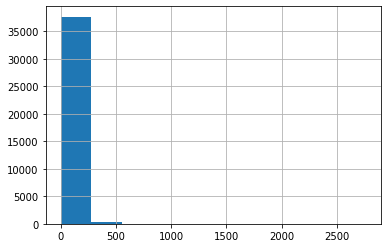

In [ ]:
work_data.len_A.hist()

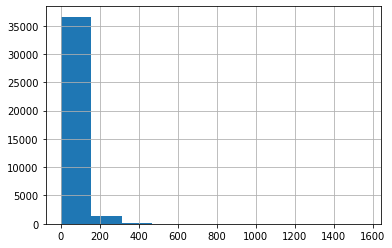

In [ ]:
work_data.len_Q.hist()

In [14]:
work_chat=work_data[(work_data['len_Q']>64)&(work_data['len_A']>64)]


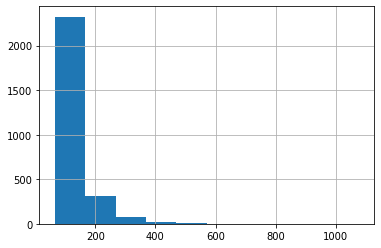

In [ ]:
work_chat.len_Q.hist()

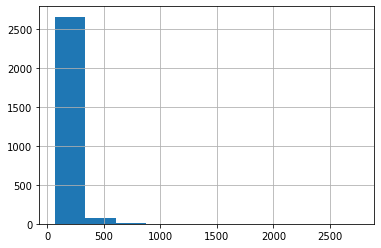

In [ ]:
work_chat.len_A.hist()

## Массив данных для обучения чат бота

In [15]:
work_chat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 35 to 38081
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2750 non-null   int64 
 1   LQ              2750 non-null   object
 2   LA              2750 non-null   object
 3   LcharacterID_A  2750 non-null   object
 4   Ans             2750 non-null   object
 5   LcharacterID_Q  2750 non-null   object
 6   Qwe             2750 non-null   object
 7   len_A           2750 non-null   int64 
 8   len_Q           2750 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 214.8+ KB


In [16]:
input_texts=work_chat['Qwe'].apply(str).sum()
#input_texts1=re.sub("\\'","",input_texts)

In [17]:
target_texts=work_chat['Ans'].apply(str).values.sum()

In [18]:
def prepare_vocab(texts):
    vocab = sorted(set(''.join(texts)))
    vocab.append('<START>')
    vocab.append('<END>')
    vocab_size = len(vocab)
    char2idx = {u:i for i, u in enumerate(vocab)}
    idx2char = np.array(vocab)
    return vocab_size, char2idx, idx2char

In [19]:
INPUT_VOCAB_SIZE, input_char2idx, input_idx2char = prepare_vocab(input_texts)
TARGET_VOCAB_SIZE, target_char2idx, target_idx2char = prepare_vocab(target_texts)

In [20]:
input_texts_data=work_chat['Qwe'].apply(str).values
#target_texts_data=work_chat['Ans'].apply(str)
target_texts_data=work_chat['Ans'].apply(str).values

In [21]:
input_texts_as_int = [[input_char2idx[c] for c in text] for text in input_texts_data]
target_texts_as_int = [[target_char2idx[c] for c in text] for text in target_texts_data]

encoder_input_seqs = [np.array(text) for text in input_texts_as_int]
decoder_input_seqs = []
decoder_target_seqs = []
for target_text in target_texts_as_int:
    decoder_input_seqs.append(np.array([target_char2idx['<START>']] + target_text))
    decoder_target_seqs.append(np.array(target_text + [target_char2idx['<END>']]))

In [ ]:
input_texts_data

array(["You're asking me out.  That's so cute. What's your name again?",
       'Gosh, if only we could find Kat a boyfriend...',
       'How is our little Find the Wench A Date plan progressing?', ...,
       'Splendid site, Crealock, splendil I want to establish Camp here immediately.',
       "Choose your targets men. That's right Watch those markers. 55",
       "Colonel Durnford... William Vereker. I hear you 've been seeking Officers?"],
      dtype=object)

In [22]:
max_enc_seq_length = 256 # max np.median([len(seq) for seq in encoder_input_seqs])
#max_enc_seq_length = np.median([len(seq) for seq in encoder_input_seqs])
max_dec_seq_length = 256 # max([len(seq) for seq in decoder_input_seqs])
#max_dec_seq_length = np.median([len(seq) for seq in decoder_input_seqs])

encoder_input_seqs = tf.keras.preprocessing.sequence.pad_sequences(
    encoder_input_seqs,
    value=input_char2idx[' '],
    padding='post',
    maxlen=max_enc_seq_length)

decoder_input_seqs = tf.keras.preprocessing.sequence.pad_sequences(
    decoder_input_seqs,
    value=target_char2idx[' '],
    padding='post',
    maxlen=max_dec_seq_length)

decoder_target_seqs = tf.keras.preprocessing.sequence.pad_sequences(
    decoder_target_seqs,
    value=target_char2idx[' '],
    padding='post',
    maxlen=max_dec_seq_length)

# Модель Seq2Seq

In [23]:
H_SIZE = 256 # Размерность скрытого состояния LSTM
EMB_SIZE = 256# размерность эмбеддингов (и для входных и для выходных цепочек)
#INPUT_VOCAB_SIZE=128
#TARGET_VOCAB_SIZE=128
class Encoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.embed = tf.keras.layers.Embedding(INPUT_VOCAB_SIZE, EMB_SIZE)
        self.lstm = tf.keras.layers.LSTM(H_SIZE, return_sequences=True, return_state=True)
        self.lstm1 = tf.keras.layers.LSTM(H_SIZE, return_sequences=False, return_state=True)
        
    def call(self, x):
        out = self.embed(x)
        out, h, c = self.lstm(out)
        _, h1, c1 = self.lstm1(out)
        state = (h, c)
        state1 = (h1, c1)
        return (state, state1)

class Decoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.embed = tf.keras.layers.Embedding(TARGET_VOCAB_SIZE, EMB_SIZE)
        self.lstm = tf.keras.layers.LSTM(H_SIZE, return_sequences=True, return_state=True)
        self.lstm1 = tf.keras.layers.LSTM(H_SIZE, return_sequences=True, return_state=True)
        self.fc = tf.keras.layers.Dense(TARGET_VOCAB_SIZE, activation='softmax')
        
    def call(self, x, init_state):
        out = self.embed(x)
        out, h, c = self.lstm(out, initial_state=init_state[0])
        out, h1, c1 = self.lstm1(out, initial_state=init_state[1])
        out = self.fc(out)
        state = (h, c)
        state1 = (h1, c1)
        return out, (state, state1)

encoder_model = Encoder()
decoder_model = Decoder()

encoder_inputs = tf.keras.layers.Input(shape=(None,))
decoder_inputs = tf.keras.layers.Input(shape=(None,))

enc_state = encoder_model(encoder_inputs)
decoder_outputs, _ = decoder_model(decoder_inputs, enc_state)

seq2seq = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
from attention_keras.layers.attention import AttentionLayer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 100

loss = tf.losses.SparseCategoricalCrossentropy()
seq2seq.compile(optimizer='rmsprop', loss=loss, metrics=['accuracy'])
seq2seq.fit([encoder_input_seqs, decoder_input_seqs], decoder_target_seqs,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS)

Epoch 1/100
43/43 [==============================] - 9s 115ms/step - loss: 2.3527 - accuracy: 0.5492
Epoch 2/100
43/43 [==============================] - 5s 115ms/step - loss: 1.5451 - accuracy: 0.6039
Epoch 3/100
43/43 [==============================] - 5s 116ms/step - loss: 1.4684 - accuracy: 0.6161
Epoch 4/100
43/43 [==============================] - 5s 117ms/step - loss: 1.3672 - accuracy: 0.6320
Epoch 5/100
43/43 [==============================] - 5s 117ms/step - loss: 1.2497 - accuracy: 0.6545
Epoch 6/100
43/43 [==============================] - 5s 117ms/step - loss: 1.1721 - accuracy: 0.6728
Epoch 7/100
43/43 [==============================] - 5s 118ms/step - loss: 1.1025 - accuracy: 0.6892
Epoch 8/100
43/43 [==============================] - 5s 119ms/step - loss: 1.0712 - accuracy: 0.6972
Epoch 9/100
43/43 [==============================] - 5s 120ms/step - loss: 1.0482 - accuracy: 0.7013
Epoch 10/100
43/43 [==============================] - 5s 120ms/step - loss: 0.9866 - accura

# Немножко "Внимания"

In [31]:
#import tensorflow as tf
max_len = max_enc_seq_length 
rnn_cell_size = 128
vocab_size=INPUT_VOCAB_SIZE

class Attention(tf.keras.Model):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

sequence_input = tf.keras.layers.Input(shape=(max_len,), dtype='int32')

embedded_sequences = tf.keras.layers.Embedding(INPUT_VOCAB_SIZE, EMB_SIZE, input_length=max_len)(sequence_input)

lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM
                                     (rnn_cell_size,
                                      dropout=0.3,
                                      return_sequences=True,
                                      return_state=True,
                                      recurrent_activation='relu',
                                      recurrent_initializer='glorot_uniform'), name="bi_lstm_0")(embedded_sequences)

lstm, forward_h, forward_c, backward_h, backward_c = tf.keras.layers.Bidirectional \
    (tf.keras.layers.LSTM
     (rnn_cell_size,
      dropout=0.2,
      return_sequences=True,
      return_state=True,
      recurrent_activation='relu',
      recurrent_initializer='glorot_uniform'))(lstm)

state_h = tf.keras.layers.Concatenate()([forward_h, backward_h])
state_c = tf.keras.layers.Concatenate()([forward_c, backward_c])

context_vector, attention_weights = Attention(32)(lstm, state_h)

output2 = tf.keras.layers.Dense(1, activation="softmax")(context_vector)

model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

# summarize layers
print(model.summary())

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
encoder_5 (Encoder)             (((None, 256), (None 1073152     input_9[0][0]                    
__________________________________________________________________________________________________
decoder_3 (Decoder)             ((None, None, 89), ( 1096281     input_10[0][0]                   
                                                                 encoder_5[0][0]            

In [29]:
BATCH_SIZE = 64
EPOCHS = 100

loss = tf.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='rmsprop', loss=loss, metrics=['accuracy'])
model.fit([encoder_input_seqs, decoder_input_seqs], decoder_target_seqs,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS)

Epoch 1/100
43/43 [==============================] - 20s 336ms/step - loss: 0.3310 - accuracy: 0.9035
Epoch 2/100
43/43 [==============================] - 14s 336ms/step - loss: 0.2818 - accuracy: 0.9202
Epoch 3/100
43/43 [==============================] - 14s 336ms/step - loss: 0.2735 - accuracy: 0.9228
Epoch 4/100
43/43 [==============================] - 14s 336ms/step - loss: 0.2743 - accuracy: 0.9223
Epoch 5/100
43/43 [==============================] - 14s 336ms/step - loss: 0.2736 - accuracy: 0.9227
Epoch 6/100
43/43 [==============================] - 14s 336ms/step - loss: 0.2665 - accuracy: 0.9243
Epoch 7/100
43/43 [==============================] - 14s 337ms/step - loss: 0.2621 - accuracy: 0.9261
Epoch 8/100
43/43 [==============================] - 14s 336ms/step - loss: 0.2584 - accuracy: 0.9279
Epoch 9/100
43/43 [==============================] - 14s 336ms/step - loss: 0.2522 - accuracy: 0.9302
Epoch 10/100
43/43 [==============================] - 14s 335ms/step - loss: 0.248

# Проверка обученной модели

In [26]:
def seq2seq_inference(input_seq):
    state = encoder_model(input_seq)

    target_seq = np.array([[target_char2idx['<START>']]])

    decoded_sentence = ''
    while True:
        output_tokens, state = decoder_model(target_seq, state)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = target_idx2char[sampled_token_index]
        decoded_sentence += sampled_char

        if (sampled_char == '<END>' or
           len(decoded_sentence) > max_dec_seq_length):
            break

        target_seq = np.array([[sampled_token_index]])

    return decoded_sentence

In [30]:
lst = np.random.randint(0, len(input_texts_data), 100)

for seq_index in lst: #range(100, 200):
    input_seq = encoder_input_seqs[seq_index: seq_index + 1]
    decoded_sentence = seq2seq_inference(input_seq)
    print('-')
    print('Input sentence:', input_texts_data[seq_index])
    print('Result sentence:', decoded_sentence)
    print('Target sentence:', target_texts_data[seq_index])

-
Input sentence: How long you been lying there playing possum with us, huh? Answer me!
Result sentence: I'm sorry, Mr. Ward, you end my word. I mean, this has be eason, Nickyes in the morning.<END>
Target sentence: He'll tell them everything to save his ass. That's how they all work it!
-
Input sentence: Isn't it great up here... He's gone now, but we had him on the run! We would've had his ass if we had horses! He's running scared!
Result sentence: The successes obtained are the results of those methods. One presupposes the other and vice versa.<END>
Target sentence: WHO! WHO'S RUNNING?!! WHO HAVE WE BEEN CHASING!?? CAN I ASK THIS QUESTION NOW!!!
-
Input sentence: I've got to put these tapes in some kind of order... and... Oh, I should get my sports jacket cleaned...  ... There's coffee if you want...
Result sentence: Nothing..  Gee, they only got out, better than the woman.<END>
Target sentence: <u>You</u> made coffee?... You're going back to work <u>and</u> you made coffee?... I lo

# Вспомогательные вычисления

In [ ]:
sum_lite=sum_char[sum_char['order']>2].sort_values('order',ascending=False)
sum_lite.head()

,characterID_f,characterID_s,movieID,order
609,u1469,u1475,166,166
5184,u5064,u5065,152,152
9377,u8408,u8409,113,113
2219,u2735,u2738,111,111
4357,u4404,u4405,109,109


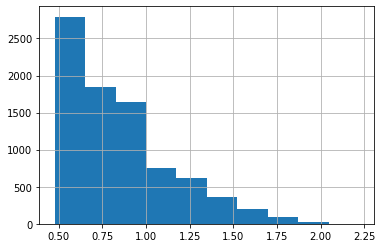

In [ ]:
sum_lite.order.agg(np.log10).hist()

In [ ]:
rel=sum_lite['characterID_f'].values+','+sum_lite['characterID_s'].values
rel_list=[]
for i in range(len(rel)):
  rel_list.append(rel[i].split(',')) 
for i  in range(len(rel_list)-1):
  for m in range(i,len(rel_list)):
    if (rel_list[i][1]==rel_list[m][0]):
      print(rel_list[i],rel_list[m])

In [ ]:
data_fpath = '/content/movie_titles_metadata_utf.txt'
max_sentences = 10000

LmovieID=[]
Lmovie_title=[]
Lmovie_year=[]
LIMDB_rating=[]
Lno_IMDB_votes=[]
Lgenres=[]

#lines = codecs.open(data_fpath, 'r', encoding='ANSI').readlines()#[:max_sentences]
lines = codecs.open(data_fpath, 'r').readlines()#[:max_sentences]
for line in lines:
    movieID, movie_title, movie_year, IMDB_rating,no_IMDB_votes,genres,= line.split(' +++$+++ ')#[:2]
    LmovieID.append(movieID)
    Lmovie_title.append(movie_title)
    Lmovie_year.append(movie_year)
    LIMDB_rating.append(IMDB_rating)
    Lno_IMDB_votes.append(no_IMDB_votes)
    ge= re.sub("']\n",'',genres)
    ge= re.sub("\['",'',ge)
    ge= re.sub("'",'',ge)
    ge=re.split(',',ge)   
    Lgenres.append(ge)         

In [ ]:
np_movie_titles_metadata=np.asarray((LmovieID, Lmovie_title,Lmovie_year,LIMDB_rating,Lno_IMDB_votes,Lgenres)).T


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array(['m9', 'the atomic submarine', '1959', '4.90', '513',
       list(['sci-fi', ' thriller'])], dtype=object)

In [ ]:
df_movie_titles_metadata.head()

,movieID,movie_title,movie_year,IMDB_rating,no. IMDB_votes,genres
0,m0,10 things i hate about you,1999,6.90,62847,"[comedy, romance]"
1,m1,1492: conquest of paradise,1992,6.20,10421,"[adventure, biography, drama, history]"
2,m2,15 minutes,2001,6.10,25854,"[action, crime, drama, thriller]"
3,m3,2001: a space odyssey,1968,8.40,163227,"[adventure, mystery, sci-fi]"
4,m4,48 hrs.,1982,6.90,22289,"[action, comedy, crime, drama, thriller]"


In [ ]:
Lposition

https://habr.com/ru/post/317732/

https://habr.com/ru/company/meanotek/blog/256987/

In [ ]:
np_movie_titles_metadata=np.asarray((LmovieID, Lmovie_title,Lmovie_year,LIMDB_rating,Lno_IMDB_votes,Lgenres)).T

In [ ]:
df_movie_titles_metadata=pd.DataFrame(data=np_movie_titles_metadata,
          index=np.array(range(len(np_movie_titles_metadata))),
          columns=['movieID', 'movie_title','movie_year', 'IMDB_rating','no. IMDB_votes','genres'] )

In [ ]:
df_movie_characters_metadata=pd.read_table('/content/movie_characters_metadata.txt',sep=' +++$+++ ')

In [ ]:
['characterID','character name','movieID','movie title','gender','position']

In [ ]:
		['movieID', 'movie_title','movie_year', 'IMDB_rating','no. IMDB_votes','genres'] 

In [ ]:
data_fpath = '/content/movie_characters_metadata_utf2.txt'
max_sentences = 10000

LcharacterID=[]
Lcharacter_name=[]
LmovieID=[]
Lmovie_title=[]
Lgender=[]
Lposition=[]
#lines = codecs.open(data_fpath, 'r', encoding='ANSI').readlines()#[:max_sentences]
i=0
f = open(data_fpath)
for line in f:
    characterID,character_name,movieID,movie_title,gender,position= line.split(' +++$+++ ')
    LcharacterID.append(characterID)
    Lcharacter_name.append(character_name)
    LmovieID.append(movieID)
    Lmovie_title.append(movie_title)
    Lgender.append(gender)
    pos= re.sub("\n",'',position)
    Lposition.append(pos)

In [ ]:
for i  in range(len(rel_list)-1):
  for m in range(i,len(rel_list)):
    if (rel_list[i][1]==rel_list[m][0]) and (rel_list[i][0]==rel_list[m][1]):
      print(rel_list[i],rel_list[m])

In [ ]:
sum_char['rel'].values

array(['u0,u11', 'u0,u2', 'u0,u3', ..., 'u998,u1004', 'u998,u1005',
       'u999,u1006'], dtype=object)

In [ ]:
sum_char_h=df_movie_conversations.groupby(['characterID_f']).count().reset_index() 

In [ ]:
sum_char_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420 entries, 0 to 5419
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   characterID_f  5420 non-null   object
 1   characterID_s  5420 non-null   int64 
 2   movieID        5420 non-null   int64 
 3   order          5420 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 169.5+ KB


In [ ]:
sum_char_w=df_movie_conversations.groupby(['characterID_f','characterID_s']).order.count()

In [ ]:
matrix=sum_char_w.unstack().reset_index()

In [ ]:
matrix.head()

characterID_s,characterID_f,u1001,u1003,u1004,u1005,u1006,u1010,u1011,u1014,u1017,u1018,u1019,u1020,u1021,u1022,u1023,u1025,u1026,u1029,u1031,u1032,u1033,u1034,u1035,u1040,u1041,u1042,u1043,u1045,u1046,u1047,u1048,u1049,u105,u1054,u1060,u1061,u1063,u1064,u1065,...,u939,u940,u941,u944,u955,u956,u957,u958,u959,u96,u961,u962,u963,u964,u966,u967,u968,u969,u97,u970,u973,u974,u977,u979,u98,u980,u981,u982,u985,u986,u987,u988,u989,u99,u990,u991,u993,u994,u997,u998
0,u0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,u1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,u10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,u100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,u1000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matrix.columns

Index(['characterID_f', 'u1001', 'u1003', 'u1004', 'u1005', 'u1006', 'u1010',
       'u1011', 'u1014', 'u1017',
       ...
       'u987', 'u988', 'u989', 'u99', 'u990', 'u991', 'u993', 'u994', 'u997',
       'u998'],
      dtype='object', name='characterID_s', length=5609)

In [ ]:
row_iterator = matrix.iterrows()

#_, last = row_iterator.next()  # take first item from row_iterator
for i, row in row_iterator:
  for m in range(2,len(matrix.columns)):
    col=matrix.columns[6]
    row[col]>1
#    print(last['characterID_f'])
#    last = row